In this we will see the effect of the outliers on the dataset and remove the outliers, that means we will drop those rows from the data set.  

At the end i have trained the model with One hot encoding and Ordinal Encoding after removing the outliers rows.  

In [72]:
# Importing the basic libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import os

In [73]:
# Getting the dataset file path.
data_path = os.path.join("Data","flight_dataset.csv")
data_path

'Data/flight_dataset.csv'

In [74]:
# Reading the data and creating the copy of the file.
data = pd.read_csv(data_path)
df= data.copy()
df.shape

(10683, 11)

In [75]:
# Total records with Trujet airlines company.
df[df["Airline"] == "Trujet"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2878,Trujet,6/03/2019,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,3h 15m,1 stop,No info,4140


In [76]:
# removing the duplicates and Trujet data.
print(f"The shape of data before removing duplicates is : {df.shape}")
df.drop_duplicates(inplace=True)
df.drop(2878,axis=0,inplace=True)
print(f"The shape of data after removing duplicates is : {df.shape}")

The shape of data before removing duplicates is : (10683, 11)
The shape of data after removing duplicates is : (10462, 11)


In [77]:
# Change the date of journey format to date time.
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"],infer_datetime_format=True)

/tmp/ipykernel_1077/1399353182.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"],infer_datetime_format=True)
/tmp/ipykernel_1077/1399353182.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"],infer_datetime_format=True)


In [78]:
# Convert the date to 3 columns day, month,and year
df['Day']=df['Date_of_Journey'].dt.day
df['Month']=df['Date_of_Journey'].dt.month
df['Year']=df['Date_of_Journey'].dt.year

In [79]:
# spliting the time to hour and min
df["Dep_hour"] = df["Dep_Time"].str.split(":").str[0]
df["Dep_min"] = df["Dep_Time"].str.split(":").str[1]
# spliting the time to hour and min
df["Arrival_Time"] = df["Arrival_Time"].str.split(" ").str[0]
df["Arival_hour"] = df["Arrival_Time"].str.split(":").str[0]
df["Arival_min"] = df["Arrival_Time"].str.split(":").str[1]

In [80]:
# converting the categorical value to numerical values.
dic = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df["Total_Stops"] = df["Total_Stops"].map(dic)

In [81]:
df["Total_Stops"] = df["Total_Stops"].fillna(0)

In [82]:
# considering this as a false value we can drop this.
df[df["Duration"] == "5m"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arival_hour,Arival_min
6474,Air India,2019-03-06,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2.0,No info,17327,6,3,2019,16,50,16,55


In [83]:
df.drop(6474,axis=0,inplace=True)

In [84]:
# spliting the duration into hours and min saperate columns.
df["Duration"] = df["Duration"].str.split(" ")
df["Trveling_hour"] = df["Duration"].str[0].str.split("h").str[0]
df["Trveling_min"] = df["Duration"].str[1].str.split("m").str[0]

In [85]:
df.drop(labels=["Date_of_Journey","Route","Dep_Time","Arrival_Time","Duration","Additional_Info"],axis=1,inplace=True)

In [86]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arival_hour,Arival_min,Trveling_hour,Trveling_min
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,09,25,04,25,19,NaN
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,2019,16,50,21,35,4,45


In [87]:
# we have some null values in Trveling_min this means the time is exact hours so replace nan with 0
df["Trveling_min"] = df["Trveling_min"].fillna(0)

In [88]:
# Converting the object type to Integer type.
df["Dep_hour"] = df["Dep_hour"].astype(int)
df["Dep_min"] = df["Dep_min"].astype(int)
df["Arival_hour"] = df["Arival_hour"].astype(int)
df["Arival_min"] = df["Arival_min"].astype(int)
df["Trveling_hour"] = df["Trveling_hour"].astype(int)
df["Trveling_min"] = df["Trveling_min"].astype(int)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        10461 non-null  object 
 1   Source         10461 non-null  object 
 2   Destination    10461 non-null  object 
 3   Total_Stops    10461 non-null  float64
 4   Price          10461 non-null  int64  
 5   Day            10461 non-null  int32  
 6   Month          10461 non-null  int32  
 7   Year           10461 non-null  int32  
 8   Dep_hour       10461 non-null  int64  
 9   Dep_min        10461 non-null  int64  
 10  Arival_hour    10461 non-null  int64  
 11  Arival_min     10461 non-null  int64  
 12  Trveling_hour  10461 non-null  int64  
 13  Trveling_min   10461 non-null  int64  
dtypes: float64(1), int32(3), int64(7), object(3)
memory usage: 1.1+ MB


In [90]:
# Saperate the categorical and numerical columns.
cat_col = df.columns[df.dtypes=='object']
num_col = df.columns[df.dtypes!='object']

In [91]:
import matplotlib.pyplot as plt 
import seaborn as sns


<Axes: xlabel='Price'>

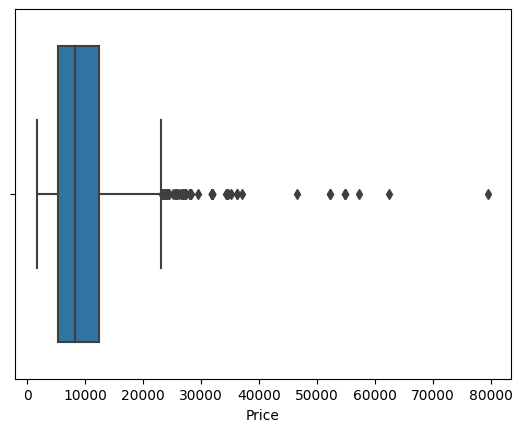

In [92]:
plt.Figure(figsize=(10,10))
sns.boxplot(data=df,x=df["Price"])

In the price columns we have more number of outliers. so we will delete the records above 30000 price and check the results.  

In [93]:
len(df[df["Price"] > 25000])

82

In [94]:
df = df.drop(df[df["Price"] > 25000].index)

<Axes: xlabel='Price'>

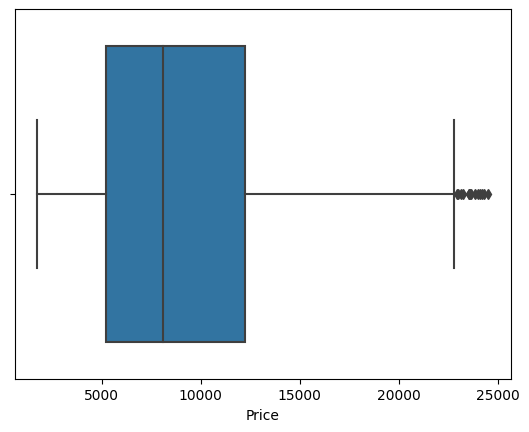

In [95]:
plt.Figure(figsize=(10,10))
sns.boxplot(data=df,x=df["Price"])

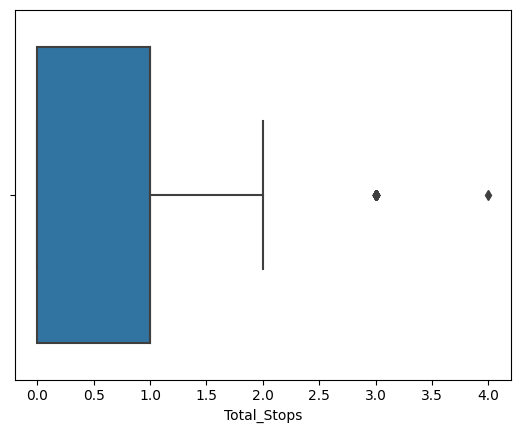

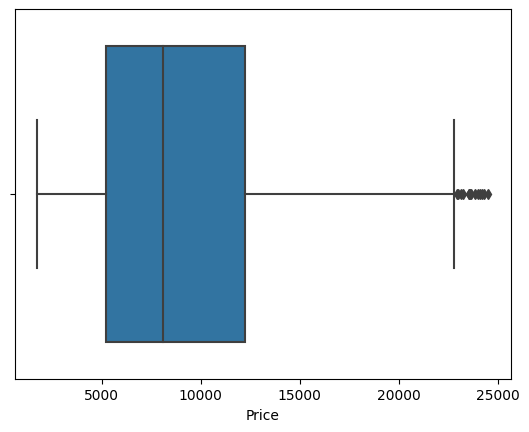

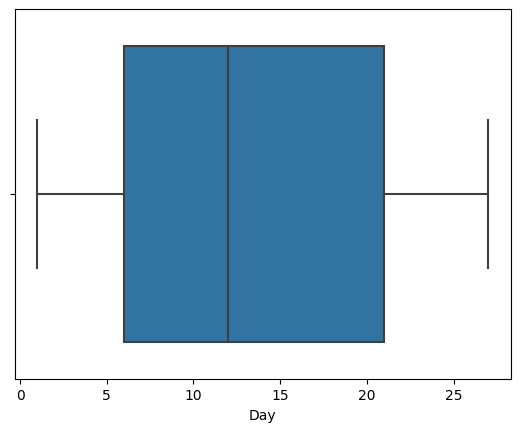

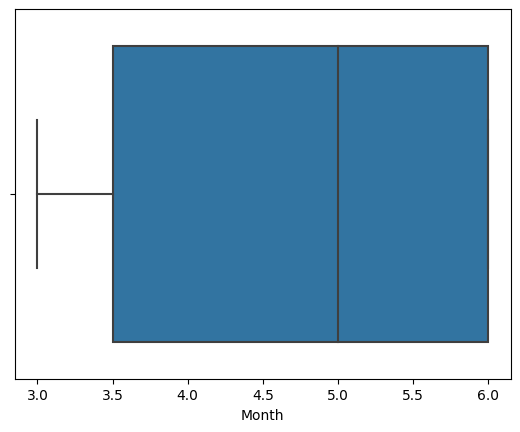

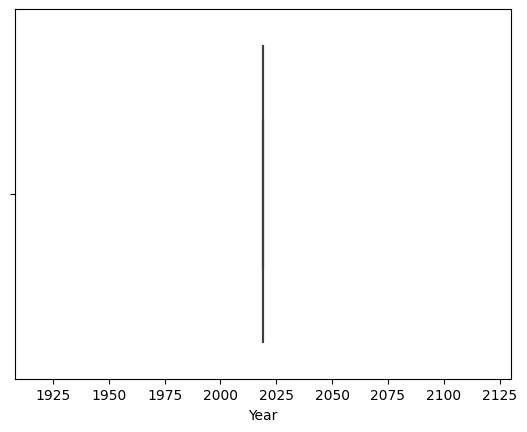

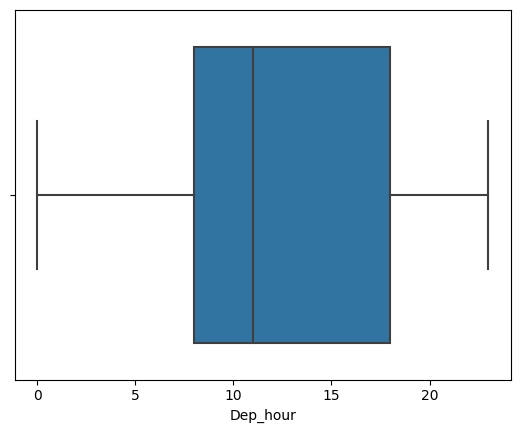

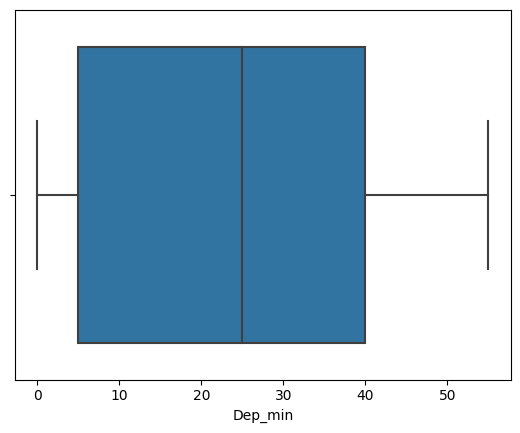

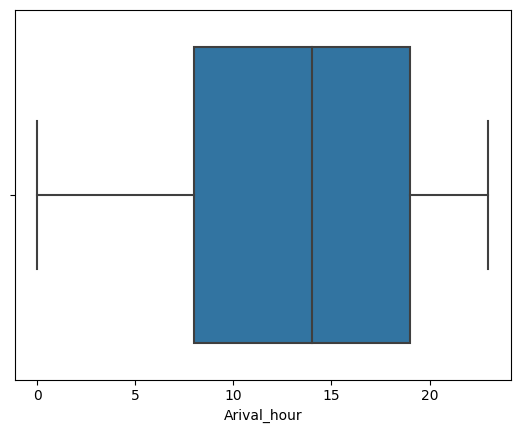

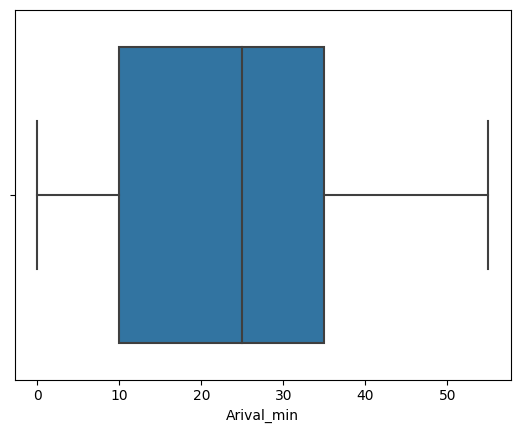

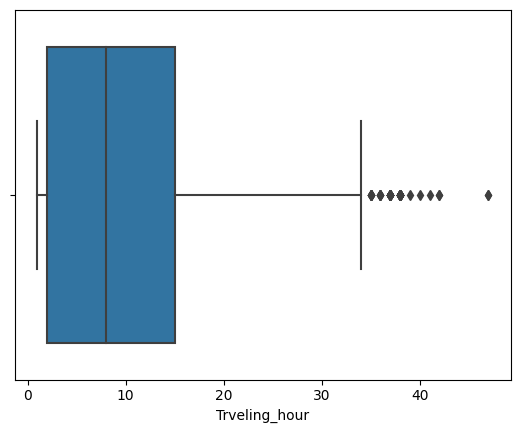

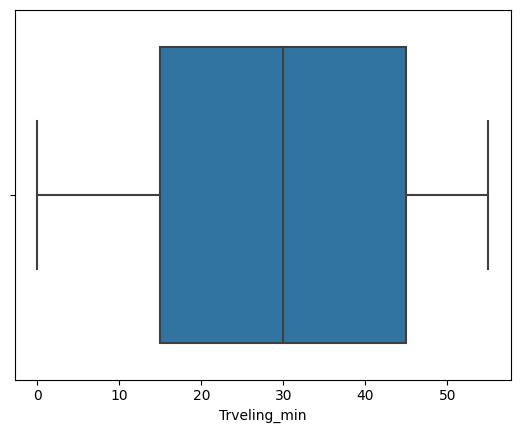

In [96]:
for i in num_col:
    #plt.Figure(figsize=(10,10))
    sns.boxplot(data=df,x=df[i])
    plt.show()

In [97]:
airline_price_stats = df.groupby('Airline')['Price'].describe()
airline_price_stats.sort_values(by=['count'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways,3642.0,11316.897309,3630.325479,1840.0,8586.0,11087.0,13994.00,24210.0
IndiGo,2043.0,5668.469897,2266.933697,2227.0,4226.0,5000.0,6493.00,22153.0
Air India,1681.0,9414.250446,3622.990251,2050.0,6587.0,9190.0,12127.00,24017.0
Multiple carriers,1191.0,10805.800168,3410.871986,5797.0,7709.0,10197.0,13587.00,24528.0
SpiceJet,815.0,4335.841718,1851.144678,1759.0,3573.0,3873.0,4760.00,23267.0
Vistara,478.0,7801.355649,2915.288625,3687.0,5403.0,7980.0,9345.00,21730.0
Air Asia,319.0,5590.260188,2027.362290,3383.0,4282.0,5162.0,6451.00,13774.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0


<Axes: xlabel='Price', ylabel='Airline'>

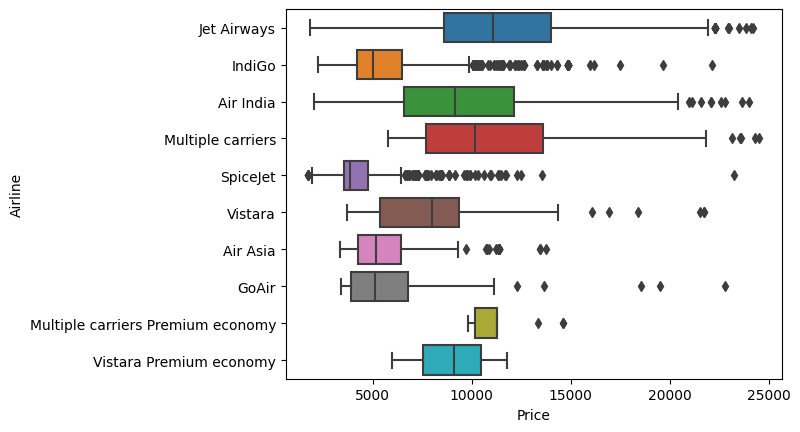

In [98]:
airline_order = airline_price_stats.sort_values(by=['count'], ascending=False).index
#sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=df, x="Price", y="Airline",order=airline_order)

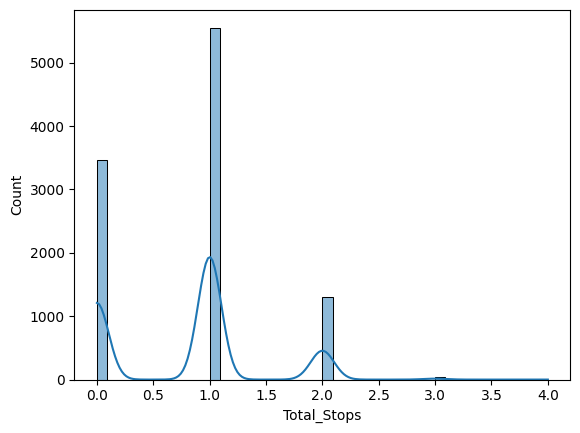

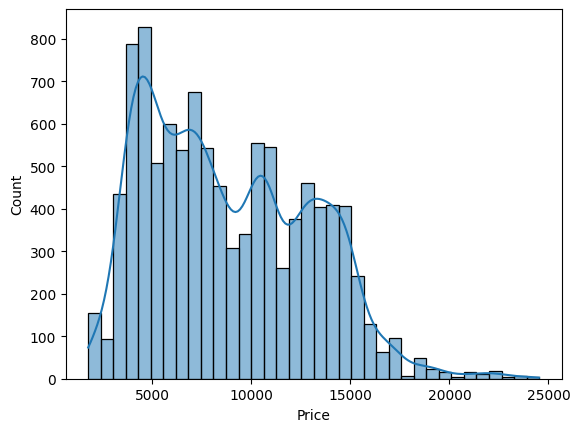

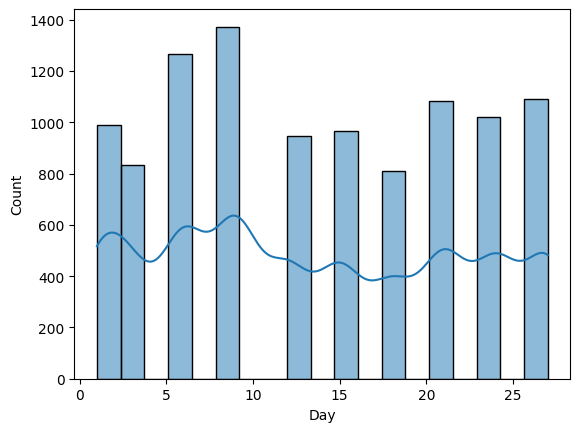

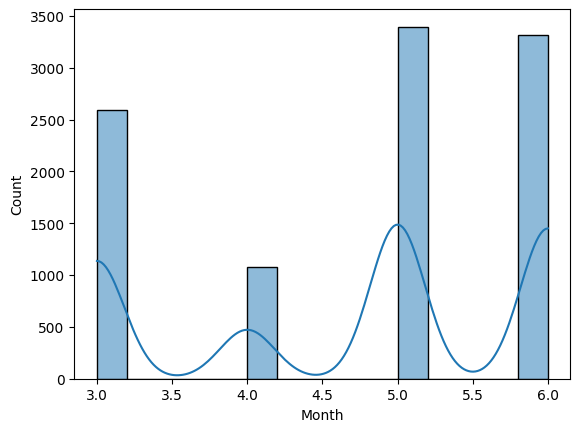

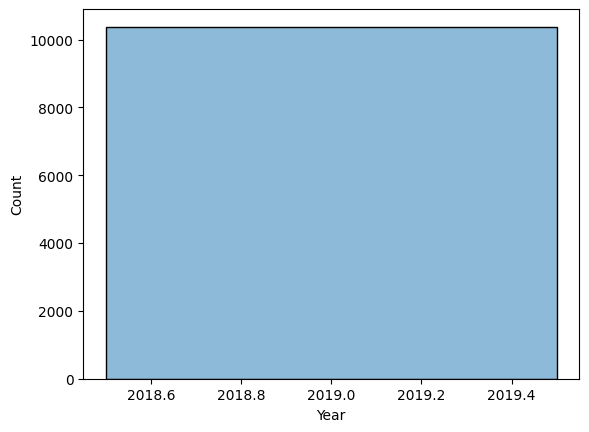

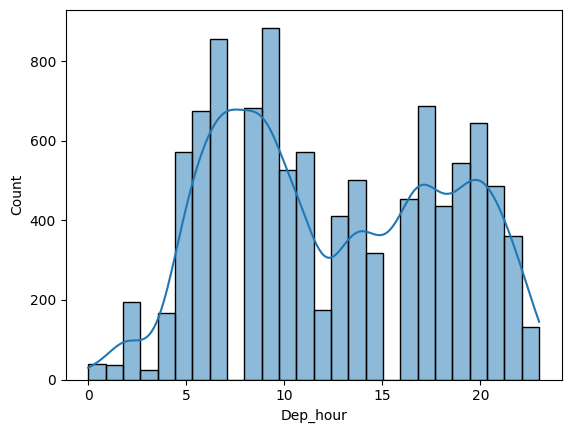

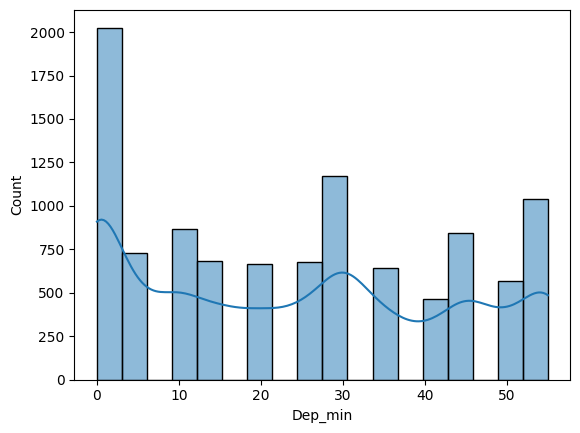

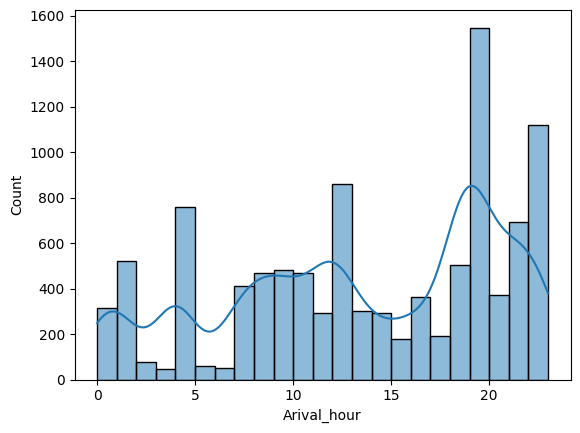

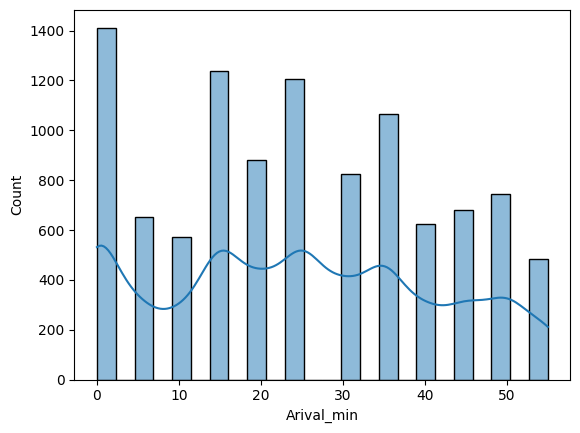

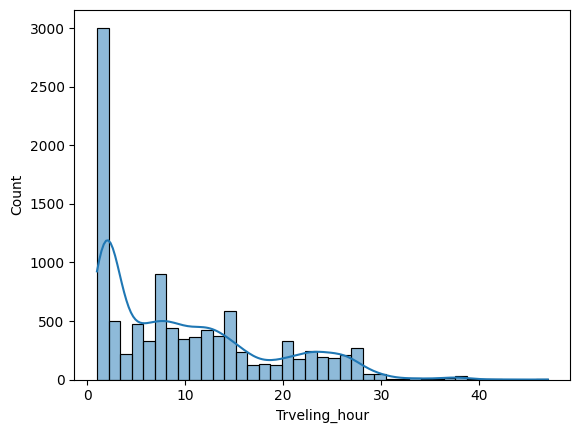

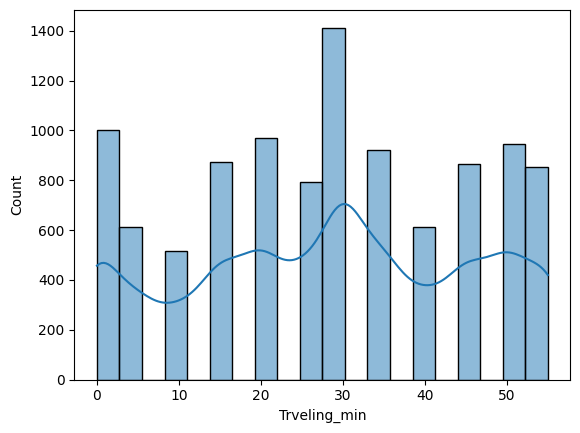

In [99]:
for i in num_col:
    plt.Figure(figsize=(18,10))
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

In [100]:
# Split the columns to independent and dependent columns.
X = df.drop(labels="Price",axis=1)
Y = df[["Price"]]

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
## Model Training
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import LinearSVC

In [102]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [103]:
# Define which columns should be ordinal-encoded and which should be scaled
# i have ordered it in lowest to highest value in the count value.
Airline_cat = ['SpiceJet','GoAir','Air Asia','IndiGo','Vistara','Vistara Premium economy','Air India','Jet Airways','Multiple carriers','Multiple carriers Premium economy','Jet Airways Business']
Source_cat = ['Chennai','Mumbai','Banglore', 'Kolkata', 'Delhi']
Dest_cat = ['Kolkata', 'Delhi', 'Hyderabad','Cochin','Banglore','New Delhi']

In [104]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    #('ordinalencoder',OneHotEncoder(handle_unknown='ignore')),
    ('ordinalencoder',OrdinalEncoder(categories=[Airline_cat,Source_cat,Dest_cat])),
    ('scaler',StandardScaler(with_mean=False))
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [105]:
# Split the data to training and testing.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [106]:
categorical_cols

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [107]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [108]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [109]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'LogisticRegression':LogisticRegression(),
    'LinearSVC':LinearSVC()

}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square*100)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 2543.394903360624
MAE: 1928.9278005278832
R2 score 61.081795256386926


Lasso
Model Training Performance
RMSE: 2543.473855221493
MAE: 1928.7640305545513
R2 score 61.07937902729654


Ridge
Model Training Performance
RMSE: 2543.3923518269185
MAE: 1928.9174684261975
R2 score 61.08187334183187


Elasticnet
Model Training Performance
RMSE: 2643.5514233365298
MAE: 2033.8237660510056
R2 score 57.95631913406463


DecisionTree
Model Training Performance
RMSE: 2214.6541773772838
MAE: 1312.7985977306785
R2 score 70.49218547620377




/config/.local/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForest
Model Training Performance
RMSE: 1748.1317427409303
MAE: 1139.2212454681014
R2 score 81.61458138005632




/config/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/config/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

LogisticRegression
Model Training Performance
RMSE: 2685.895120249742
MAE: 1687.8082851637764
R2 score 56.598643299607865


LinearSVC
Model Training Performance
RMSE: 2707.4652948943153
MAE: 1660.2209377007066
R2 score 55.89873956663512




/config/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [110]:
a =pd.DataFrame(r2_list,model_list)
a.sort_values(by=0)

,0
LinearSVC,55.898740
LogisticRegression,56.598643
Elasticnet,57.956319
Lasso,61.079379
LinearRegression,61.081795
Ridge,61.081873
DecisionTree,70.492185
RandomForest,81.614581


# Result with one hot encoding 
LogisticRegression	59.289446.  
Elasticnet	62.220536.  
LinearSVC	62.920427.  
LinearRegression	65.555083.  
Lasso	65.555320.  
Ridge	65.556512.  
DecisionTree	70.655380.  
RandomForest	81.726347.  

# Result with Ordinal Encoding.  
LinearSVC	55.898740.  
LogisticRegression	56.598643.  
Elasticnet	57.956319.  
Lasso	61.079379.  
LinearRegression	61.081795.  
Ridge	61.081873.  
DecisionTree	70.492185.  
RandomForest	81.614581.  